<a href="https://colab.research.google.com/github/g7mack/Machine-Learning-Engineering/blob/main/MLE_ICA_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds

train_ds, test_ds = tfds.load('fashion_mnist', split=['train', 'test'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.L68TZM_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.L68TZM_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
import pandas as pd
import numpy as np

def convert_tf_dataset_to_df(tf_dataset):
    images = []
    labels = []
    for example in tf_dataset:
        images.append(example['image'].numpy().flatten())
        labels.append(example['label'].numpy())
    return pd.DataFrame(images), pd.Series(labels)

train_df_images, train_df_labels = convert_tf_dataset_to_df(train_ds)
test_df_images, test_df_labels = convert_tf_dataset_to_df(test_ds)

combined_df_images = pd.concat([train_df_images, test_df_images], ignore_index=True)
combined_df_labels = pd.concat([train_df_labels, test_df_labels], ignore_index=True)

X = combined_df_images
y = combined_df_labels

print("Shape of combined features (X):", X.shape)
print("Shape of combined labels (y):", y.shape)

Shape of combined features (X): (70000, 784)
Shape of combined labels (y): (70000,)


In [ ]:
X = X / 255.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
rf_classifier.fit(X, y)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

print("Feature importances calculated successfully.")

Feature importances calculated successfully.


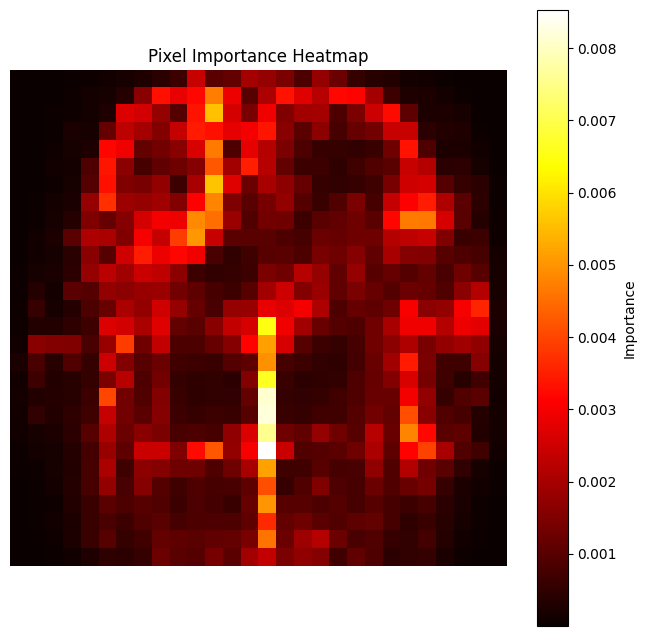

In [ ]:
import matplotlib.pyplot as plt

# Reshape the feature importances to a 28x28 image
feature_importance_image = feature_importances.reshape(28, 28)

# Visualize the feature importance as a heatmap
plt.figure(figsize=(8, 8))
plt.imshow(feature_importance_image, cmap='hot', interpolation='nearest')
plt.title('Pixel Importance Heatmap')
plt.colorbar(label='Importance')
plt.axis('off')
plt.show()